# Final Project – Glass Identification Data Set EDA

Name: Qixiao Zhu
Class: CSCI 349 - Intro to Data Mining
Semester: Spring 2023
Instructor: Brian King

# Objective

I am trying to develop a machine learning model to classify the types of glass using different attributes of the glass. From the website description of the dataset: "The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!"

---
# Dataset

I am using the "Glass Identification Data Set" from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Glass+Identification to train and test my model. The data features 9 numeric attributes and classify the instances in one of seven types of glass.

The dataset was from:
(a) Creator: B. German -- Central Research
Establishment Home Office Forensic Science
Service Aldermaston, Reading, Berkshire
RG7 4PN
(b) Donor: Vina Spiehler, Ph.D., DABFT
Diagnostic Products Corporation (213)
776-0180 (ext 3014)
(c) Date: September, 1987 3.

The variables are:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent
in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron

The types of glass are:
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

---
# Preprocessing

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

First we are going to read in the dataframe and set the columns to their correct names.

In [45]:
df = pd.read_csv("./data/glass.data", index_col=0, names=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"])
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


Check if all the columns are in the correct types.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


All the attributes are of the correct types, but the target column should be categorical.

In [47]:
df["Type of glass"] = df["Type of glass"].astype("category")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   RI             214 non-null    float64 
 1   Na             214 non-null    float64 
 2   Mg             214 non-null    float64 
 3   Al             214 non-null    float64 
 4   Si             214 non-null    float64 
 5   K              214 non-null    float64 
 6   Ca             214 non-null    float64 
 7   Ba             214 non-null    float64 
 8   Fe             214 non-null    float64 
 9   Type of glass  214 non-null    category
dtypes: category(1), float64(9)
memory usage: 17.1 KB


From the description, there is no NaN element in this dataframe, so no need to worry about empty variables. Also from the description, there is no 4 in target classes, so in reality only 6 classes in total.

In [49]:
df["Type of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

As we see, this dataset is very imbalanced. Further processing is needed before training the model.

---
# Visualization

In [50]:
df.shape

(214, 10)

In [51]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


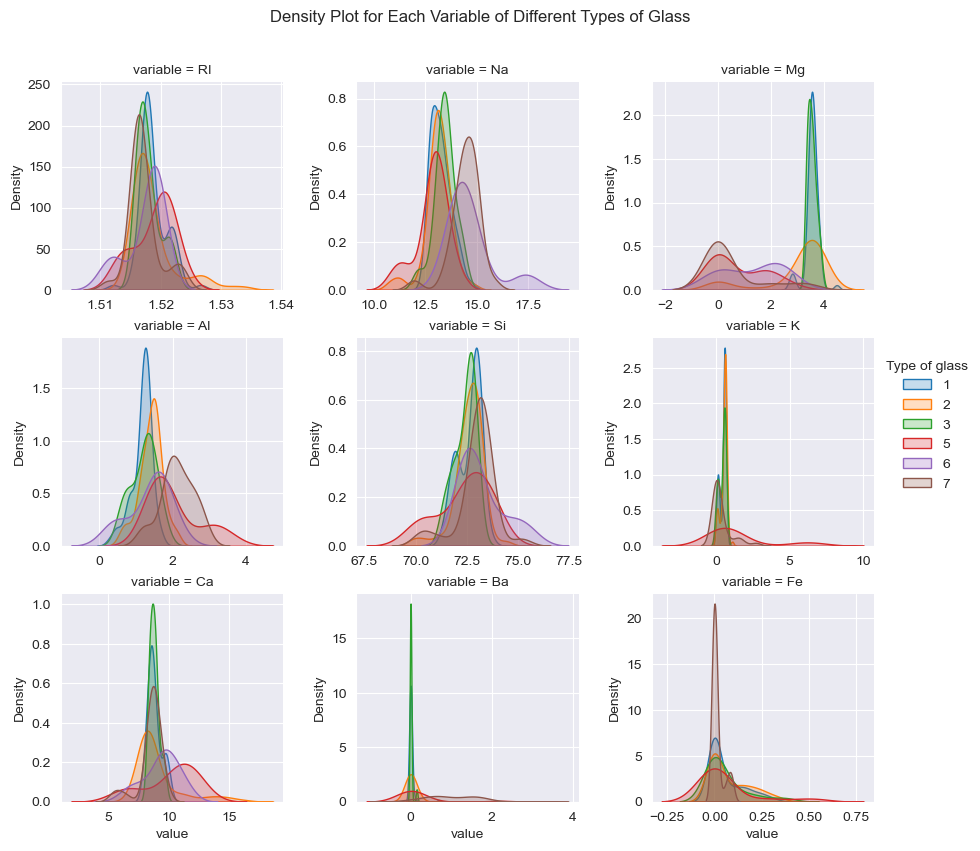

In [52]:
# ChatGPT

# melt the data and store as df_melt
df_melt = df.melt(id_vars=['Type of glass'])

g = sns.FacetGrid(df_melt, col="variable", col_wrap=3, hue="Type of glass", sharex=False, sharey=False)
g.map(sns.kdeplot, "value", fill=True, warn_singular=False)
g.add_legend()
plt.suptitle("Density Plot for Each Variable of Different Types of Glass")
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()

From the above graphs, we can see the general distribution of each variable. We can see that some variables, such as (Si) Silicon and (Na) Sodium, are much more prevalent in glass-making, and it seems like they are contained in every type of glass, because both of their values are far from zero.

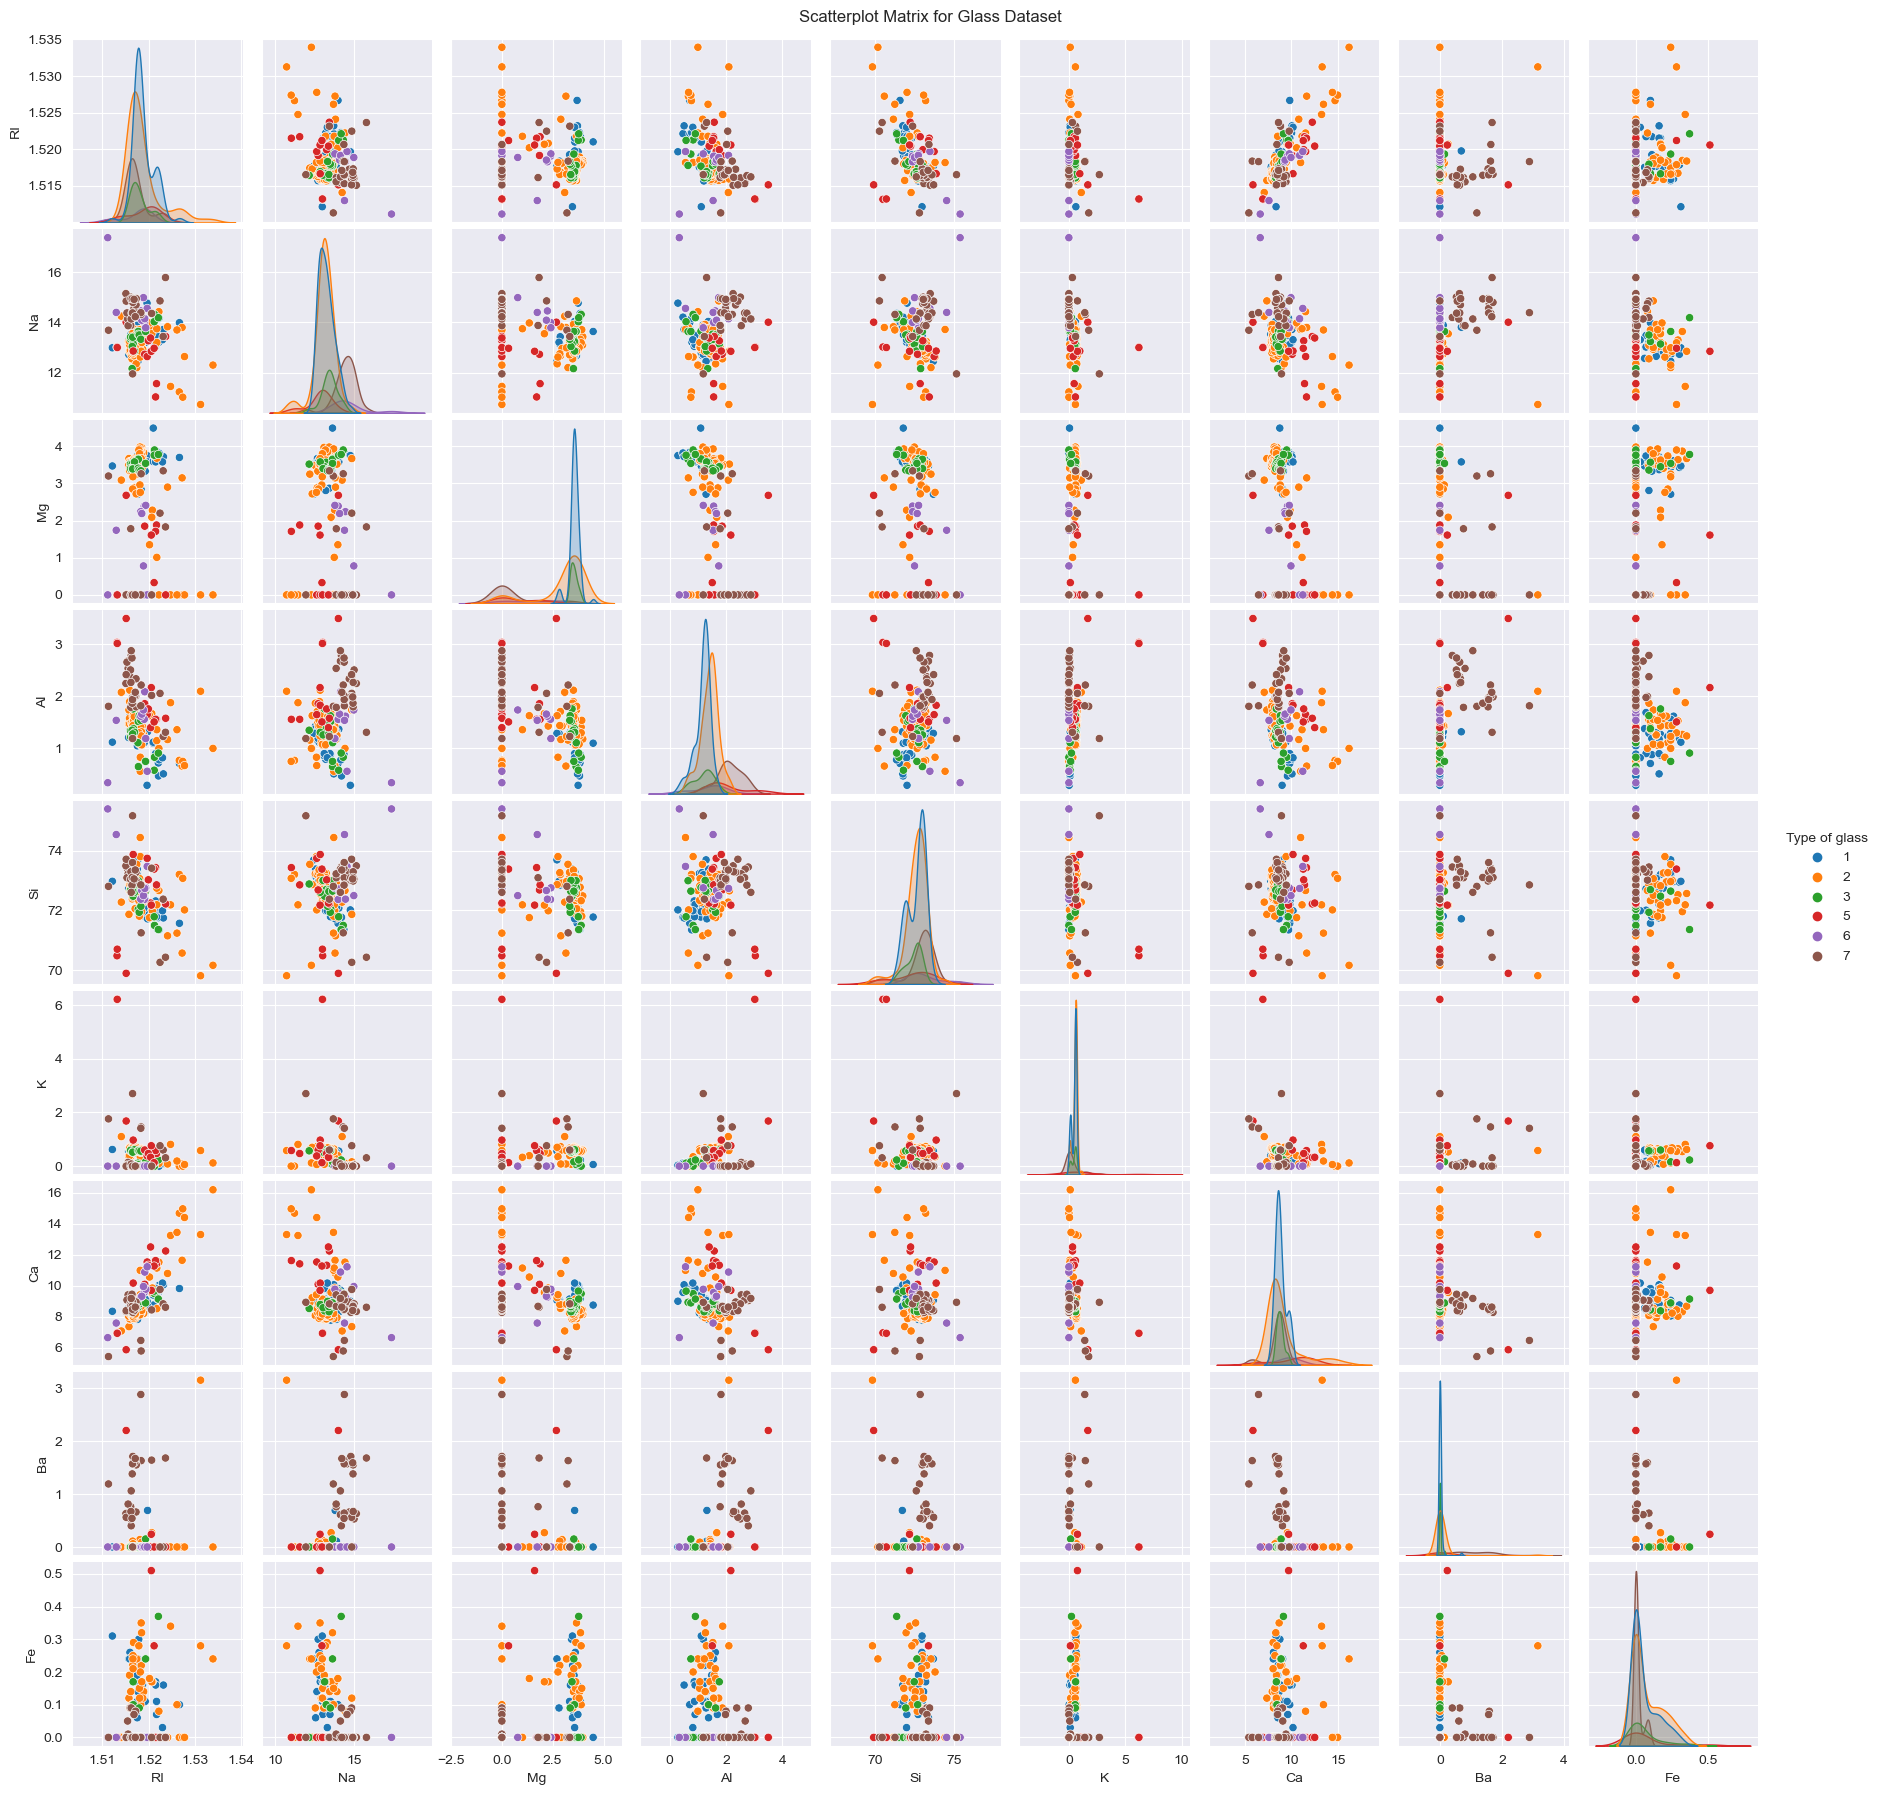

In [53]:
sns.pairplot(df, hue='Type of glass', height=2, aspect=1)
plt.suptitle("Scatterplot Matrix for Glass Dataset", y=1)
plt.show()

The above graph shows all the scatterplots of all possible combinations of two variables. We can see that generally the different types of glass tend to group together, but the groups are not very visibly separated.

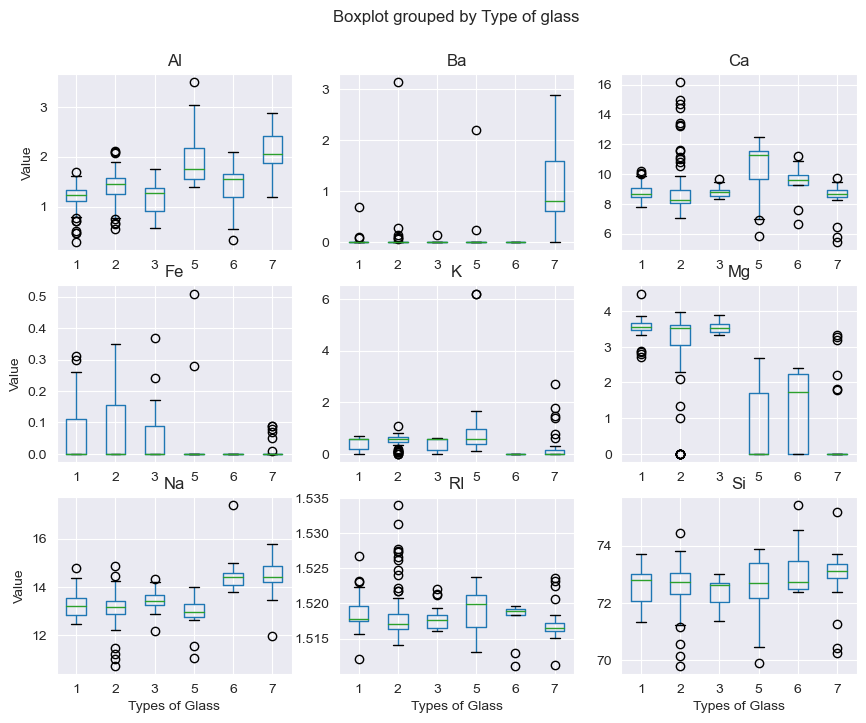

In [54]:
# ChatGPT

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
df.boxplot(by='Type of glass', ax=axes, sharex=False, sharey=False)

# remove the x-axis label from all subplots and set y-label for the first column
for i, ax in enumerate(axes.flat):
    if i % 3 == 0: # first column
        ax.set_ylabel('Value')
    ax.set_xlabel('')

for ax in axes[-1]:
    ax.set_xlabel('Types of Glass')

plt.show()

From the above graph, we can see the boxplot for every variable of every type of glass. We can see a lot of outliers with a lot of the variables. Next we will look at how the data is distributed.

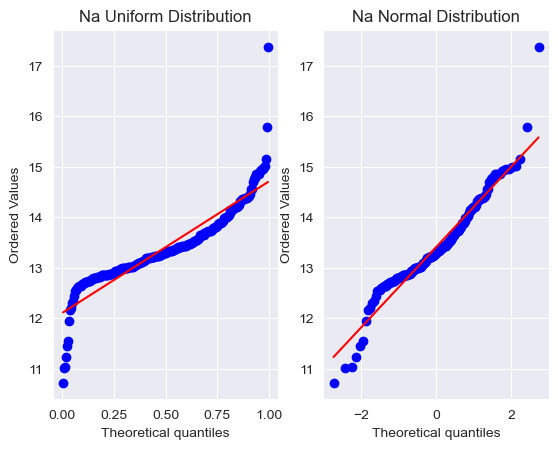

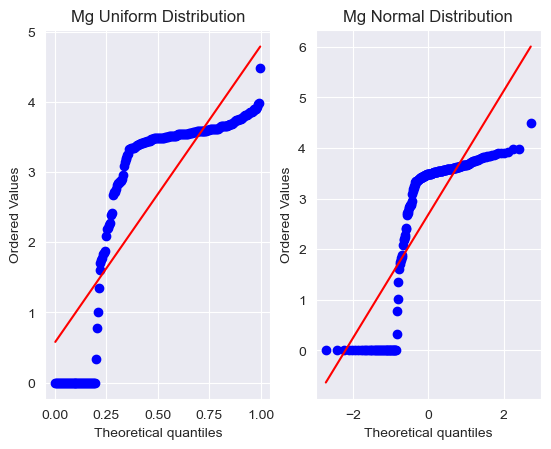

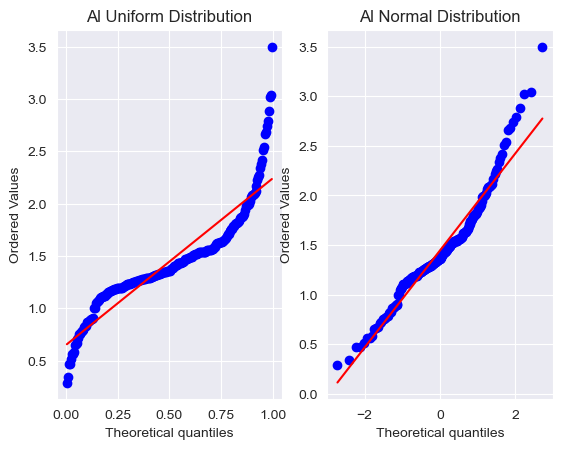

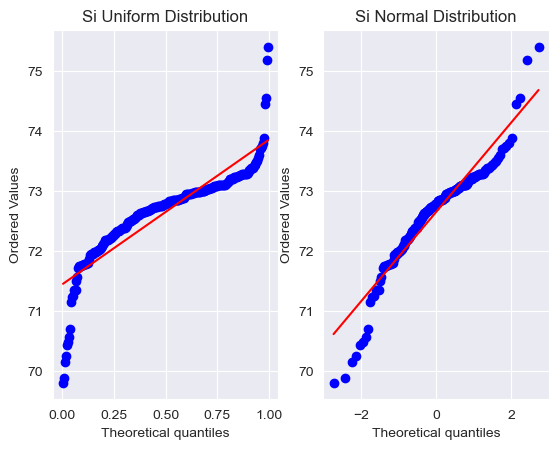

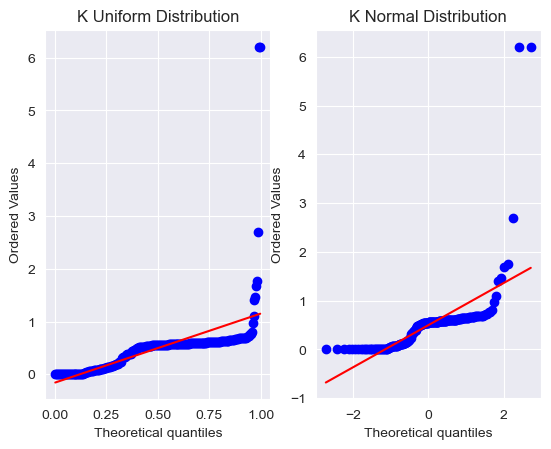

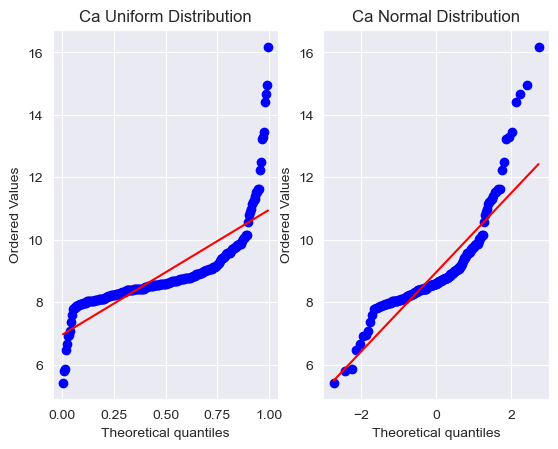

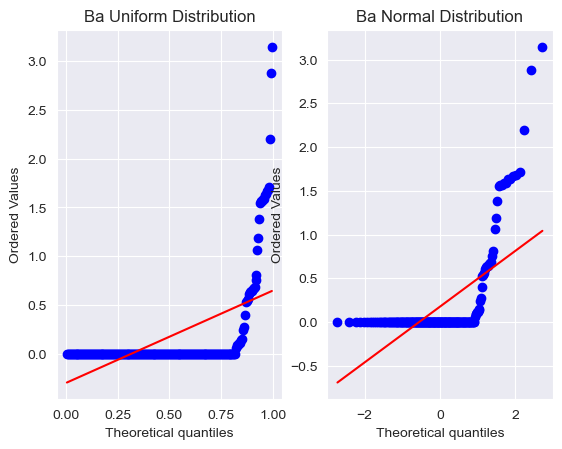

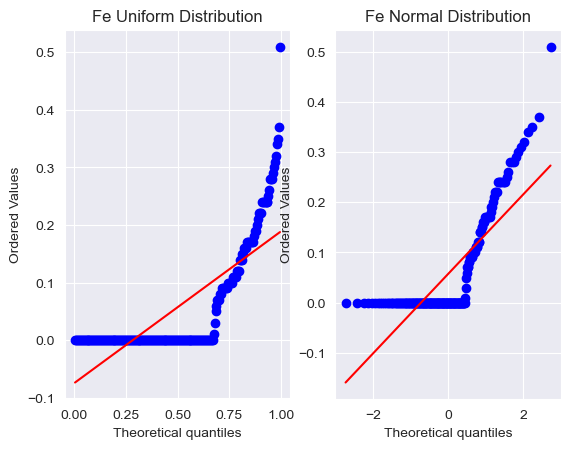

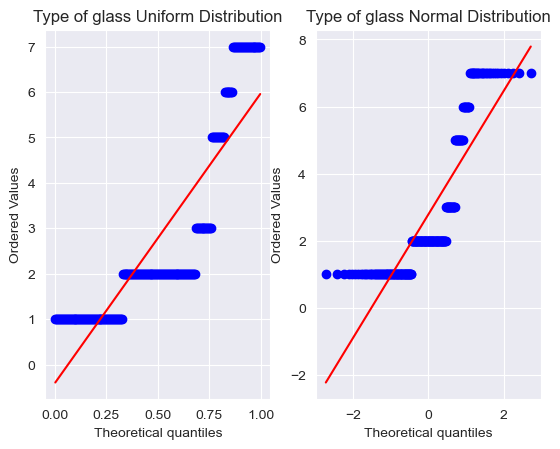

In [55]:
for col_name in df.columns[1:]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    stats.probplot(df[col_name], dist='uniform', plot=ax1)
    ax1.set_title(col_name + " Uniform Distribution")
    stats.probplot(df[col_name], dist='norm', plot=ax2)
    ax2.set_title(col_name + " Normal Distribution")
    plt.show()

We can say that not all variables are normally distributed. Since linear regression assumes the data to be normally distributed, normalizing the data is critical before we start to train the model.

---
# Summary

From the description of the dataset, we know that the original usage of this dataset was to compare the performance between BEAGLE, Nearest-Neighbor, and Discriminant Analysis. I decided to use a neural network. This is a classification dataset, in which I will train a Neural Network model to predict the types of glass from the 8 variables. There are in total 7 types of glass, but only 6 are in the dataset. I will likely use the softmax activation function in the last layer, since we will have multiple outputs.
From the description, we know that the following results were obtained (# incorrect answers):

Type of Sample -- Beagle -- NN -- DA
Windows that were float processed (87) -- 10 -- 12 -- 21
Windows that were not: (76) -- 19 -- 16 -- 22

I would like to try and compare the performance of the neural network to these previous models. I do not expect this dataset to be a difficult one to classify, but I would love to see what kinds of unexpected challenges that might come up during the development and training of my model. I will do my work individually and completely learn the process of developing a neural network model. I expect to figure out the structure of my model in a short time, but I want to spend a lot of time tuning the hyperparameters and making minor adjustments so that my model will perform the best.